In [26]:
import librosa, librosa.display 
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
import cv2
from tqdm import tqdm

In [2]:
images = sorted(glob.glob('/home/vislab/dolearn-jimin-41/data/image_plt/Mel-Spectrogram_example_plt*.png'))
images

['/home/vislab/dolearn-jimin-41/data/image_plt/Mel-Spectrogram_example_plt000.png',
 '/home/vislab/dolearn-jimin-41/data/image_plt/Mel-Spectrogram_example_plt001.png',
 '/home/vislab/dolearn-jimin-41/data/image_plt/Mel-Spectrogram_example_plt002.png',
 '/home/vislab/dolearn-jimin-41/data/image_plt/Mel-Spectrogram_example_plt003.png',
 '/home/vislab/dolearn-jimin-41/data/image_plt/Mel-Spectrogram_example_plt004.png',
 '/home/vislab/dolearn-jimin-41/data/image_plt/Mel-Spectrogram_example_plt005.png',
 '/home/vislab/dolearn-jimin-41/data/image_plt/Mel-Spectrogram_example_plt006.png',
 '/home/vislab/dolearn-jimin-41/data/image_plt/Mel-Spectrogram_example_plt007.png',
 '/home/vislab/dolearn-jimin-41/data/image_plt/Mel-Spectrogram_example_plt008.png',
 '/home/vislab/dolearn-jimin-41/data/image_plt/Mel-Spectrogram_example_plt009.png',
 '/home/vislab/dolearn-jimin-41/data/image_plt/Mel-Spectrogram_example_plt010.png',
 '/home/vislab/dolearn-jimin-41/data/image_plt/Mel-Spectrogram_example_plt01

In [3]:
mel_images=[]
for fname in images:
    image_pil = Image.open(fname).convert('L')
    image_bw = np.array(image_pil)
    mel_images.append(image_bw)

    #plt.imshow(image_bw)
    #plt.show()

mel_images=np.array(mel_images)

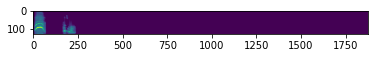

In [4]:
plt.imshow(mel_images[0])

In [5]:
mel_images.shape

(332, 128, 1876)

In [6]:
from sklearn.preprocessing import StandardScaler

x_train = np.expand_dims(mel_images, 1) #DataNum, 1ch, H, W

print(x_train.shape)
scaler = StandardScaler()

b,c,h,w = x_train.shape
print(b,c,h,w)
x_train = np.reshape(x_train, newshape=(b,-1))
x_train = scaler.fit_transform(x_train)
x_train = np.reshape(x_train, newshape=(b,c,h,w))
#x_train = np.reshape(x_train, newshape=(b,h,w,c))

print(x_train.shape)
import joblib
# 객체를 pickled binary file 형태로 저장한다
#file_name = 'scaler.pkl'
#joblib.dump(scaler, file_name)


(332, 1, 128, 1876)
332 1 128 1876
(332, 1, 128, 1876)


In [7]:
y_data_label=np.array(pd.read_csv('/home/vislab/dolearn-jimin-41/data/y_data_label.csv')['0'])
y_data_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_data_label, test_size=0.33, random_state=42, stratify = y_data_label)

In [10]:
import random

random.seed(1)

x_train = x_train.astype('float')
x_test = x_test.astype('float')
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(222, 1, 128, 1876)
(110, 1, 128, 1876)
(222,)
(110,)


In [17]:
import torch
import torch.nn as nn

seed = 1
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

class ParallelModel(nn.Module):
    def __init__(self,num_emotions):
        super().__init__()

            # 1. conv block
        self.relu = nn.ReLU()
        self.conv1= nn.Conv2d(in_channels=1,
                   out_channels=16,
                   kernel_size=3,
                   stride=1,
                   padding=1
                  )
        
     
        self.bn1 = nn.BatchNorm2d(16)

        self.mp1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.do = nn.Dropout2d(p=0.3)
        # 2. conv block
        self.conv2= nn.Conv2d(in_channels=16,
                   out_channels=32,
                   kernel_size=3,
                   stride=1,
                   padding=1
                  )
        self.bn2 = nn.BatchNorm2d(32)
        self.mp2 = nn.MaxPool2d(kernel_size=4, stride=4)

        # 3. conv block
        self.conv3 = nn.Conv2d(in_channels=32,
                   out_channels=64,
                   kernel_size=3,
                   stride=1,
                   padding=1
                  )
        self.bn3 = nn.BatchNorm2d(64)

        # 4. conv block
        self.conv4= nn.Conv2d(in_channels=64,
                   out_channels=128,
                   kernel_size=3,
                   stride=1,
                   padding=1
                  )
        self.bn4= nn.BatchNorm2d(128)

        # Linear softmax layer
        self.out_linear = nn.Linear(1792,num_emotions)
        self.out_softmax = nn.Softmax(dim=1)
        
    def forward(self,x):

        # transformer embedding
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.do(self.mp1(out))
        out = self.relu(self.bn2(self.conv2(out)))
        out = self.do(self.mp2(out))
        out = self.relu(self.bn3(self.conv3(out)))
        out = self.do(self.mp2(out))
        out = self.relu(self.bn4(self.conv4(out)))
        out = self.do(self.mp2(out))


        conv_embedding = torch.flatten(out, start_dim=1)

        output_logits = self.out_linear(conv_embedding)
        output_softmax = self.out_softmax(output_logits)
        return output_logits, output_softmax  
    
    
model = ParallelModel(num_emotions=2).to(device)
print('Number of trainable params: ',sum(p.numel() for p in model.parameters()) )


cuda
Number of trainable params:  101218


In [21]:
EPOCHS=25
DATASET_SIZE = x_train.shape[0]
BATCH_SIZE = 8

##baseline에서 사용한 optimizer는 SGD이며 하이퍼파라미터는 다음과 같습니다.
##Learning rate = 0.01, momentum=0.9
OPTIMIZER = torch.optim.SGD(model.parameters(),lr=0.01, momentum=0.9)

In [22]:
def loss_fnc(predictions, targets):
    return nn.CrossEntropyLoss()(input=predictions,target=targets)

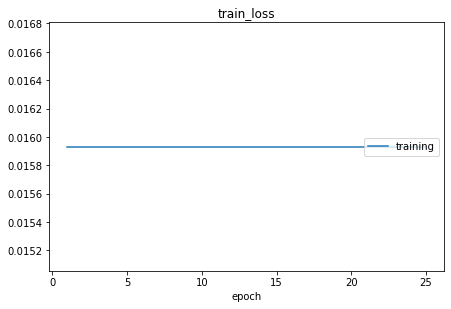

24 4.544771400105674e-06 1.0


In [23]:
from livelossplot import PlotLosses
liveloss = PlotLosses()

logs = {}
train_predicts = []

model.train()

for epoch in range(EPOCHS):
    # shuffle data
    ind = np.random.permutation(DATASET_SIZE)

    x_train = x_train[ind,:,:,:]
    y_train = y_train[ind]

    
    #print(x_train.shape)
    #print(y_train.shape)
    
    epoch_loss = 0
    
    iters = int(DATASET_SIZE / BATCH_SIZE)
     
    for i in range(iters):
        ### indexing과정을 통해 작성된 Dataloader 코드
        batch_start = i * BATCH_SIZE
        batch_end = min(batch_start + BATCH_SIZE, DATASET_SIZE)
        actual_batch_size = batch_end-batch_start
        
        x = x_train[batch_start:batch_end,:,:,:]
        y = y_train[batch_start:batch_end]

        #print(x.shape)
        #print(y.shape)
        
        ###--------------------작성해야할 부분--------------------------------
        ##1.train 데이터를 torch tensor로 타입 변경 및 gpu 설정
        ##2.데이터를 모델의 입력으로 넣어 예측 후 loss 계산 및 optimization 
        x_tensor = torch.tensor(x,device=device).float()
        y_tensor = torch.tensor(y, dtype=torch.long, device=device)

        #print(x_tensor.shape)
        #print(y_tensor.shape)
        
        # forward pass
        print(x_tensor.shape)
        output_logits, output_softmax = model(x_tensor)
        
        train_predictions = torch.argmax(output_softmax,dim=1).cpu().numpy()
        train_predicts.append(train_predictions)

        # compute loss
        loss = loss_fnc(output_logits, y_tensor)
        
        # compute gradients
        OPTIMIZER.zero_grad()
        loss.backward()
        # update parameters
        OPTIMIZER.step()

        epoch_loss += loss.item()*actual_batch_size/DATASET_SIZE

    ###liveloss 함수를 사용하기 위한 코드들
    logs['train_loss'] = epoch_loss
        
    liveloss.update(logs)
    liveloss.draw()

    print(epoch,loss.item(),accuracy_score(y, train_predictions))

In [27]:
model.eval()

predicts = []

with torch.no_grad():
    for data in tqdm(x_test):
        data = torch.FloatTensor(data).to(device).unsqueeze(1)

        _ , output_softmax = model(data)
        predictions = torch.argmax(output_softmax,dim=1).cpu().numpy()
        predicts.append(predictions)

print(f'predict_len:{len(predicts)}')

100%|██████████| 110/110 [00:00<00:00, 647.88it/s]

predict_len:110


In [28]:
print(accuracy_score(y_test, predicts))

1.0


In [29]:
y_test

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0])